## Sobre o Dataset

O dataset utilizado contém dados de

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random as rand

df = pd.read_csv('dados/house-price.csv', index_col=None)
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


## Limpeza do dataset

In [21]:
ad = df['Address']

ad.str.extract(r'([^0123456789,]+)')

,0
0,Blasiusstraat
1,Kromme Leimuidenstraat
2,Zaaiersweg
3,Tenerifestraat
4,Winterjanpad
...,...
915,Ringdijk
916,Kleine Beerstraat
917,Stuyvesantstraat
918,John Blankensteinstraat


## Gráfico do preço em função da area

O gráfico abaixo mostra o crescimento linear do preço dos imóveis variando de acordo com suas áreas em m².

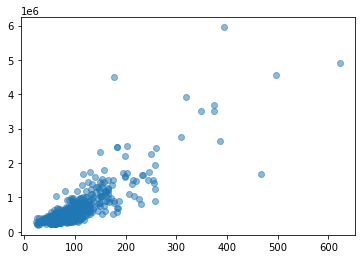

In [22]:
X_train = df['Area'][:500]
y_train = df['Price'][:500]

plt.scatter(x=X_train, y=y_train, alpha=0.5)
plt.show()

## Código e gráfico da função de custo

Código que calcula as variáveis da regressão linear, tais como o valor predito, o erro e as derivadas.

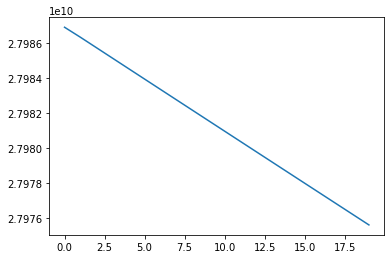

In [30]:
# Learning Rate
lr = 0.001
# Weight
w = rand.random()
# Bias
b = 0
# MSE (Cost Function)
mse = []
N = len(X_train)

# 20 épocas
for i in range(20):
    for j in range(N):
        # Predição do modelo
        pred = (X_train[j] * w) + b
        # Erro calculado
        error = pred - y_train[j]

        # Calculos das derivadas
        dw  = (1 / N) * X_train[j] * error
        db = (1 / N) * error

        # Atualização dos parâmetros
        w = w - lr * dw
        b = b - lr * db
    # Lista para fazer o gráfico da função de custo
    mse.append(error ** 2)

plt.plot(mse)
plt.show()

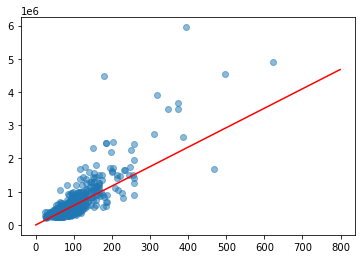

In [31]:
regression_line = [(x * w + b) for x in range(800)]

plt.scatter(x=X_train, y=y_train,  alpha=0.5)
plt.plot(regression_line, color='red')
plt.show()

In [25]:
display(df[['Area', 'Price']][910:920])

,Area,Price
910,111,849000.0
911,108,539000.0
912,59,525000.0
913,194,1500000.0
914,41,295000.0
915,117,750000.0
916,72,350000.0
917,51,350000.0
918,113,599000.0
919,79,300000.0


In [26]:
print('preço estimado:', int(108 * w + b))

preço estimado: 631739
